In [3]:
import os

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import enlighten

from IPython.core.display import HTML
from IPython.display import SVG, Image, display

#RDKit related imports
from rdkit import RDLogger
from rdkit.Chem import PandasTools, AllChem as Chem, Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import Draw
from rdkit import DataStructs

In [4]:
dataset = 'harvard_hergcentral'

In [5]:
dir = f'{dataset}_OUTPUT'

In [6]:
x_train = pd.read_csv(f'./{dir}/x_train.txt', delimiter=" ")
y_train = pd.read_csv(f'./{dir}/y_train.txt', delimiter=",")
x_test = pd.read_csv(f'./{dir}/x_test.txt', delimiter=" ")
y_test = pd.read_csv(f'./{dir}/y_test.txt', delimiter=",")

In [7]:
from collections import Counter

In [8]:
x_train_np = np.array(x_train)
y_train_np = np.array(y_train).reshape(-1)
x_test_np = np.array(x_test)
y_test_np = np.array(y_test).reshape(-1)

# x_val_np = np.array(x_val)
# y_val_np = np.array(y_val)


In [9]:
y_train.shape

(223512, 1)

In [10]:
ratio = round((Counter(y_train_np)[0]) / Counter(y_train_np)[1])

In [11]:
x_train_np.shape

(223512, 1826)

In [12]:
y_train_np

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
y_test_actives = []
x_test_actives = []

for ID, i in enumerate(y_train_np):
    if i == 1:
        y_test_actives.append(i)
        x_test_actives.append(x_train_np[ID])



In [14]:
y_test_actives = np.array(y_test_actives)
x_test_actives = np.array(x_test_actives)

In [18]:
y_test_actives

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
x_train_np[0]

array([ 0.08813115,  0.08437114, -0.25941403, ..., -0.0120128 ,
       -0.00448703, -0.00986504])

In [ ]:
# CID_train_markers = pd.read_csv(f'./{dir}/CID_train.txt', delimiter=",")
# CID_test_markers = pd.read_csv(f'./{dir}/CID_test.txt', delimiter=",")

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import History, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.models
import tensorflow as tf

2022-12-12 09:57:03.332694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 09:57:03.332706: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/nathaniel/anaconda3/envs/assay_ML/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
from sklearn.metrics import recall_score


def f1_score_threshold(threshold=0.5):
    def f1_score(y_true, y_predict):
        threshold_value = threshold
        y_predict = tf.cast(tf.greater(tf.clip_by_value(y_predict, 0, 1), threshold_value), tf.float32)
        true_pos = tf.round(tf.reduce_sum(tf.clip_by_value(y_true * y_predict, 0, 1)))
        pred_pos = tf.reduce_sum(y_predict)
        prec_rat = true_pos / (pred_pos + 10e-6)

        poss_pos = tf.reduce_sum(tf.clip_by_value(y_true, 0, 1))
        recall_ratio = true_pos / (poss_pos + 10e-6)

        return (2 * recall_ratio * prec_rat) / (recall_ratio + prec_rat + 10e-6)
    
    return f1_score

In [21]:
model = Sequential([
    #Input
    Dense(units=2000, input_dim=x_train_np.shape[1], activation='relu', kernel_initializer='glorot_uniform'),
    BatchNormalization(),
    Dropout(0.75),

    Dense(units=500, activation='relu', kernel_initializer='glorot_uniform'),
    BatchNormalization(),
    Dropout(0.75),

    Dense(units=10, activation='relu', kernel_initializer='glorot_uniform'),
    BatchNormalization(),
    Dropout(0.75),

    Dense(1, activation='sigmoid')
])

2022-12-12 09:57:09.467119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 09:57:09.467369: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 09:57:09.467452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-12 09:57:09.467521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-12 09:57:09.467588: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              3654000   
                                                                 
 batch_normalization (BatchN  (None, 2000)             8000      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               1000500   
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 500)               0

In [23]:
class_weight = {0: 1, 1:ratio}

In [24]:
import tempfile

initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')

model.save_weights(initial_weights)

optimiser = Adam(lr=0.0001)
model.compile(optimizer=optimiser, loss='binary_crossentropy', metrics=[f1_score_threshold(0.5), 'acc'])

model.load_weights(initial_weights)

/home/nathaniel/anaconda3/envs/assay_ML/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


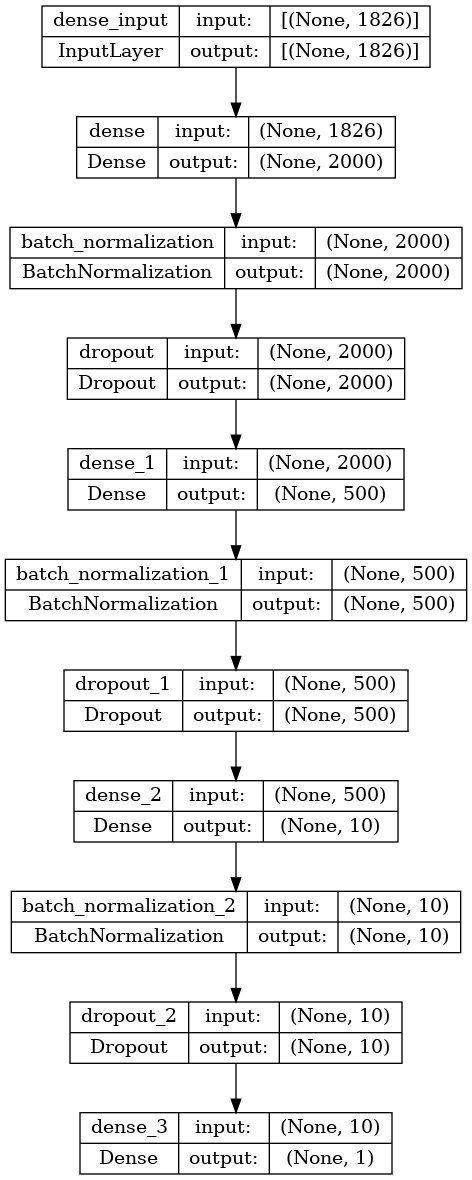

In [27]:
image_model = tf.keras.utils.plot_model(model, f"{dataset}_model.png", show_shapes=True)
display(Image(filename=f"{dataset}_model.png"))

In [ ]:
history = model.fit(x_train_np, y_train_np, batch_size=256, epochs=1000, class_weight=class_weight)

Epoch 1/200
 54/870 [>.............................] - ETA: 2s - loss: 2.6116 - f1_score: 0.0095 - acc: 0.4879

2022-11-25 15:01:16.266642: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


870/870 [==============================] - 4s 3ms/step - loss: 2.0354 - f1_score: 0.0114 - acc: 0.5066
Epoch 2/200
870/870 [==============================] - 2s 3ms/step - loss: 1.8227 - f1_score: 0.0113 - acc: 0.5176
Epoch 3/200
870/870 [==============================] - 2s 3ms/step - loss: 1.6860 - f1_score: 0.0122 - acc: 0.5183
Epoch 4/200
870/870 [==============================] - 2s 3ms/step - loss: 1.5713 - f1_score: 0.0123 - acc: 0.5298
Epoch 5/200
870/870 [==============================] - 2s 3ms/step - loss: 1.5511 - f1_score: 0.0126 - acc: 0.5348
Epoch 6/200
870/870 [==============================] - 2s 3ms/step - loss: 1.5773 - f1_score: 0.0133 - acc: 0.5417
Epoch 7/200
870/870 [==============================] - 2s 3ms/step - loss: 1.4995 - f1_score: 0.0141 - acc: 0.5524
Epoch 8/200
870/870 [==============================] - 2s 3ms/step - loss: 1.4520 - f1_score: 0.0143 - acc: 0.5658
Epoch 9/200
870/870 [==============================] - 2s 3ms/step - loss: 1.4178 - f1_score

dict_keys(['loss', 'f1_score', 'acc'])


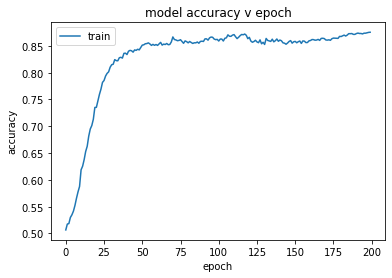

In [ ]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.title('model accuracy v epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
# plt.show()

plt.savefig(f'{assay}_model_accuracy.png')


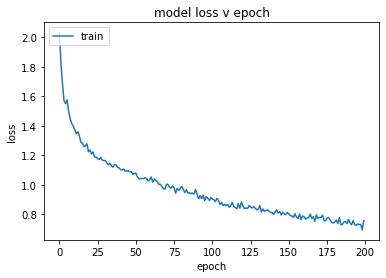

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss v epoch')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train'], loc='upper left')
# plt.show()
plt.savefig(f'{assay}_model_loss.png')

# padel_model.save(f'{assay}_model')

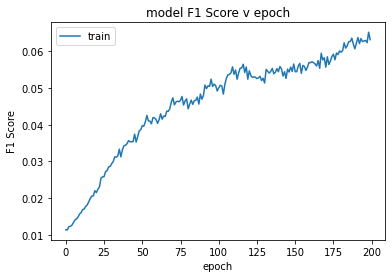

In [ ]:
plt.plot(history.history['f1_score'])
plt.title('model F1 Score v epoch')
plt.ylabel('F1 Score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
# plt.show()

plt.savefig(f'{assay}_model_f1.png')

In [ ]:
model.save(f'{dataset}_model')

INFO:tensorflow:Assets written to: 1511_model/assets


In [ ]:
# padel_model.evaluate(x_test_np, y_test_np)

model.evaluate(x_test_np, y_test_np)

2319/2319 [==============================] - 3s 1ms/step - loss: 0.1920 - f1_score: 0.0272 - acc: 0.9321


[0.19196701049804688, 0.027184300124645233, 0.9321318864822388]